<h1><u>Covid-19 Data Analysis using Python.</u></h3>

# 1.Importing important libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#importing covid-19 dataset 
df = pd.read_csv("covid19_Confirmed_dataset.csv")

In [52]:
df.shape

(266, 104)

In [53]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [54]:
#dropping unnecessary cols

df.drop(["Lat", "Long"], axis=1, inplace=True)

In [55]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


# 2.Aggregating by the country name

In [56]:
df_agg = df.groupby("Country/Region").sum()

In [57]:
df_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [58]:
df_agg.shape

(187, 100)

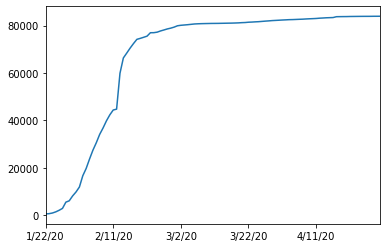

In [59]:
#Visualization is an important aspect when it comes to analysis.
#Lets plot for China's data.

df_agg.loc["China"].plot()

# 3.Calculating a good measure 

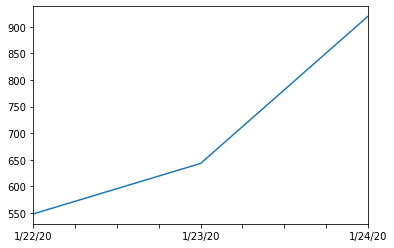

In [60]:
df_agg.loc["China"][:3].plot();

### Calculating and plotting first derivative of the curve

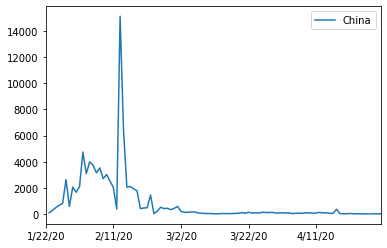

In [61]:
df_agg.loc['China'].diff().plot()
plt.legend()

In [62]:
#maximum infection rate in china in one day
df_agg.loc['China'].diff().max()

15136.0

In [63]:
#maximum infection rate in India in one day
df_agg.loc['India'].diff().max()

1893.0

### Finding the max infection rate for all countries and putting in dataset¶

In [77]:
countries = list(df_agg.index)
max_infection_rates = []
for i in countries:
    max_infection_rates.append(df_agg.loc[i].diff().max())
df_agg["max_infect_rate"] = max_infection_rates
df_agg.head()    

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infect_rate,max_infaect_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1279,1351,1463,1531,1703,1828,1939,2171,232.0,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,663,678,712,726,736,750,766,773,34.0,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,3007,3127,3256,3382,3517,3649,3848,4006,199.0,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,731,738,738,743,743,743,745,43.0,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,26,27,27,27,27,5.0,5.0


### Creating a new dataframe with only needed column 

In [78]:
corona_data = pd.DataFrame(df_agg["max_infect_rate"])
corona_data.head()

,max_infect_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [79]:
corona_data.shape

(187, 1)

# 4. Importing new datset.

   • Importing the WorldHappinessRepost.csv dataset<br>
   • Selecting needed columns for analysis.<br>
   • Join the datasets.<br>
   • Calculating correlations as the result of our analysis.

In [81]:
happiness_report_csv = pd.read_csv("worldwide_happiness_report.csv")

In [82]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [83]:
happiness_report_csv.shape

(156, 9)

In [84]:
#droping the columns we don't need
useless_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]
happiness_report_csv.drop(useless_cols,axis=1,inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [86]:
#changing the indices of the dataframe
happiness_report_csv.set_index("Country or region",inplace = True)
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Let's join dataset we have prepared 

In [87]:
happiness_report_csv.shape

(156, 4)

In [88]:
corona_data.shape

(187, 1)

In [89]:

data = corona_data.join(happiness_report_csv,how="inner")
data.head()

,max_infect_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Correlation matrix 

In [90]:
data.corr()

,max_infect_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infect_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


# 5.Visualization of the results. 

In [91]:
data.head()

,max_infect_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [107]:
# Creating a function for getting a regplot for each variable
def viz(x,y):
    x = data[x]
    y = data[y]
    # y-axis is spreaded more than x-axis, therefore using log function.
    sns.regplot(x, np.log(y))

### Plotting GDP Vs Maximum Infection rate

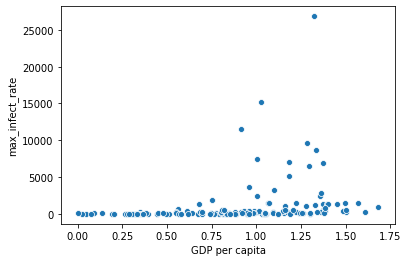

In [97]:
x = data["GDP per capita"]
y = data["max_infect_rate"]
sns.scatterplot(x,y);

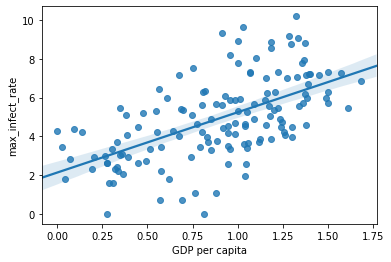

In [108]:
viz("GDP per capita", "max_infect_rate")

### Plotting Socia Support Vs Maximum Infection rate

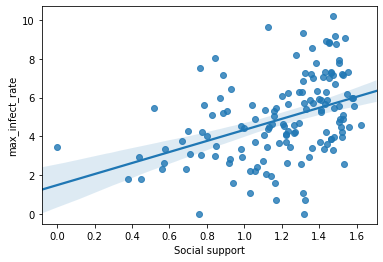

In [109]:
viz('Social support', 'max_infect_rate')

### Plotting Healthy life expectancy Vs Max infection rate

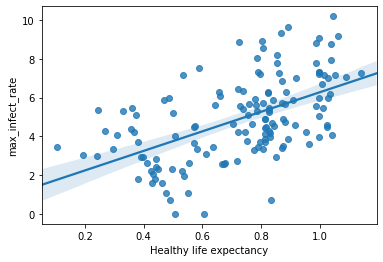

In [111]:
viz("Healthy life expectancy", "max_infect_rate")

### Plotting Freedom to make life choices Vs Max infection rate

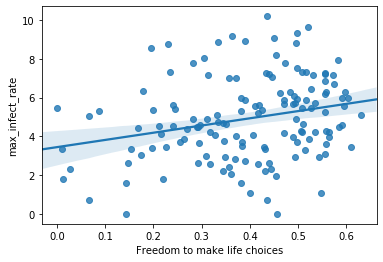

In [112]:
viz("Freedom to make life choices", "max_infect_rate")